# a Deep Learning Project (CNN)

## What is TensorFlow?

deep learning or numerical computing library. at first developed by Google to deal with unstructured data.

### Why TensorFlow?
- write fast deep learning codes in python (able to run on gpu)
- able to access many pre-built deep learning models
- whole stack: preprocess data, model, deploy

#### GPU means Graphical Processing Unit
faster than CPU in numerical Computing.

## Transfer Learning

- Take what you know in one domain and apply it to another
- starting from scratch can be expensive and time consuming
- why not take advantage of what is already out there?

# Google Colab Prepration

### We want to use google colab for faster GPU.

## Project: Kaggle Dog Breed Identification

* Instead of download data we can use kaggle api

### in colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens


2. Click on Create New API Token - It will download kaggle.json file on your machine.


3. Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

3) files.upload()

Choose the kaggle.json file that you downloaded

4) ! mkdir ~/.kaggle

5) ! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there.

6) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file.

7) ! kaggle datasets list

### Download Data

8) ! copy api of data set

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip train.zip -d train

# End to end multi class dog breed identification

This notebook builds classifier using Tensorflow:

## 1. Problem

identifying the bread of a dog using an image of a dog.

when i'm sitting in a cafe and i take a photo of a dog, want to know what breed of dog it is.

## 2. Data

the data we're using is from Kaggle's dog breed identification competitions.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

the evaluation is a file with prediction probabilities for each dog breed for each image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

some information about data:
* we're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* there are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in test set.
* There are around 10,000+ images in train set.

# Get Workspace ready

* Import Tensorflow 2.x 
* Import TensorFlow hub 
* Make sure we're using GPU


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
print("TensorFlow version: ", tf.__version__)
print("TensorFlow-hub version: ", hub.__version__)
print("GPU","available" if tf.config.list_physical_devices("GPU")
                        else "not available")

TensorFlow version:  2.5.0-dev20201129
TensorFlow-hub version:  0.10.0.dev
GPU not available


## in colab:

if the gpu is not available go to the runtime then change runtime type. 

## in Windows:

https://stackoverflow.com/questions/59823283/could-not-load-dynamic-library-cudart64-101-dll-on-tensorflow-cpu-only-install

https://medium.com/@viveksingh.heritage/how-to-install-tensorflow-gpu-version-with-jupyter-windows-10-in-8-easy-steps-8797547028a4

### What is the difference between CPU,GPU,TPU?
- CPU: Central processing Unit.

- GPU: Graphics Processing unit.

- TPU: Tensor Processing unit.

All three are designed for different applications.

1. CPU is designed for general purpose applications, used in all embedded systems or desktops, laptops, mobile phones to run applications apps, or software do normal number crunching at the end result, 32bit or 64bit max at a time, it used windows, Linux or RTOS for micro controller as a OS.

2. GPU is specifically used for Graphics processing where lot of DSP operations happen like multiplications and addition and custom hardware is built to do this operations simple and faster, than a CPU, this is mainly used for gaming applications or high definition video editing.

3. TPU is Custom Asic Built by Google, to do tons of data processing, at low precision, it is used by its many of the services which google offers like google street view, google search, or google photos, it is has AI feature like machine learning capability feature, and all this proprietary at this moment not much info available outside. neither is it available for sale as of now. and multiple TPUs are connected to forma a Super Computer to Crunch huge amount of data what google generates from its data centers

## getting our data ready and turning it to tensors
whit all machine learning models, our data needs to be in numerical form, so we use tensors (numpy arrays or matrix)

In [5]:
import pandas as pd
import numpy as np

label_csv=pd.read_csv("labels.csv")
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<AxesSubplot:>

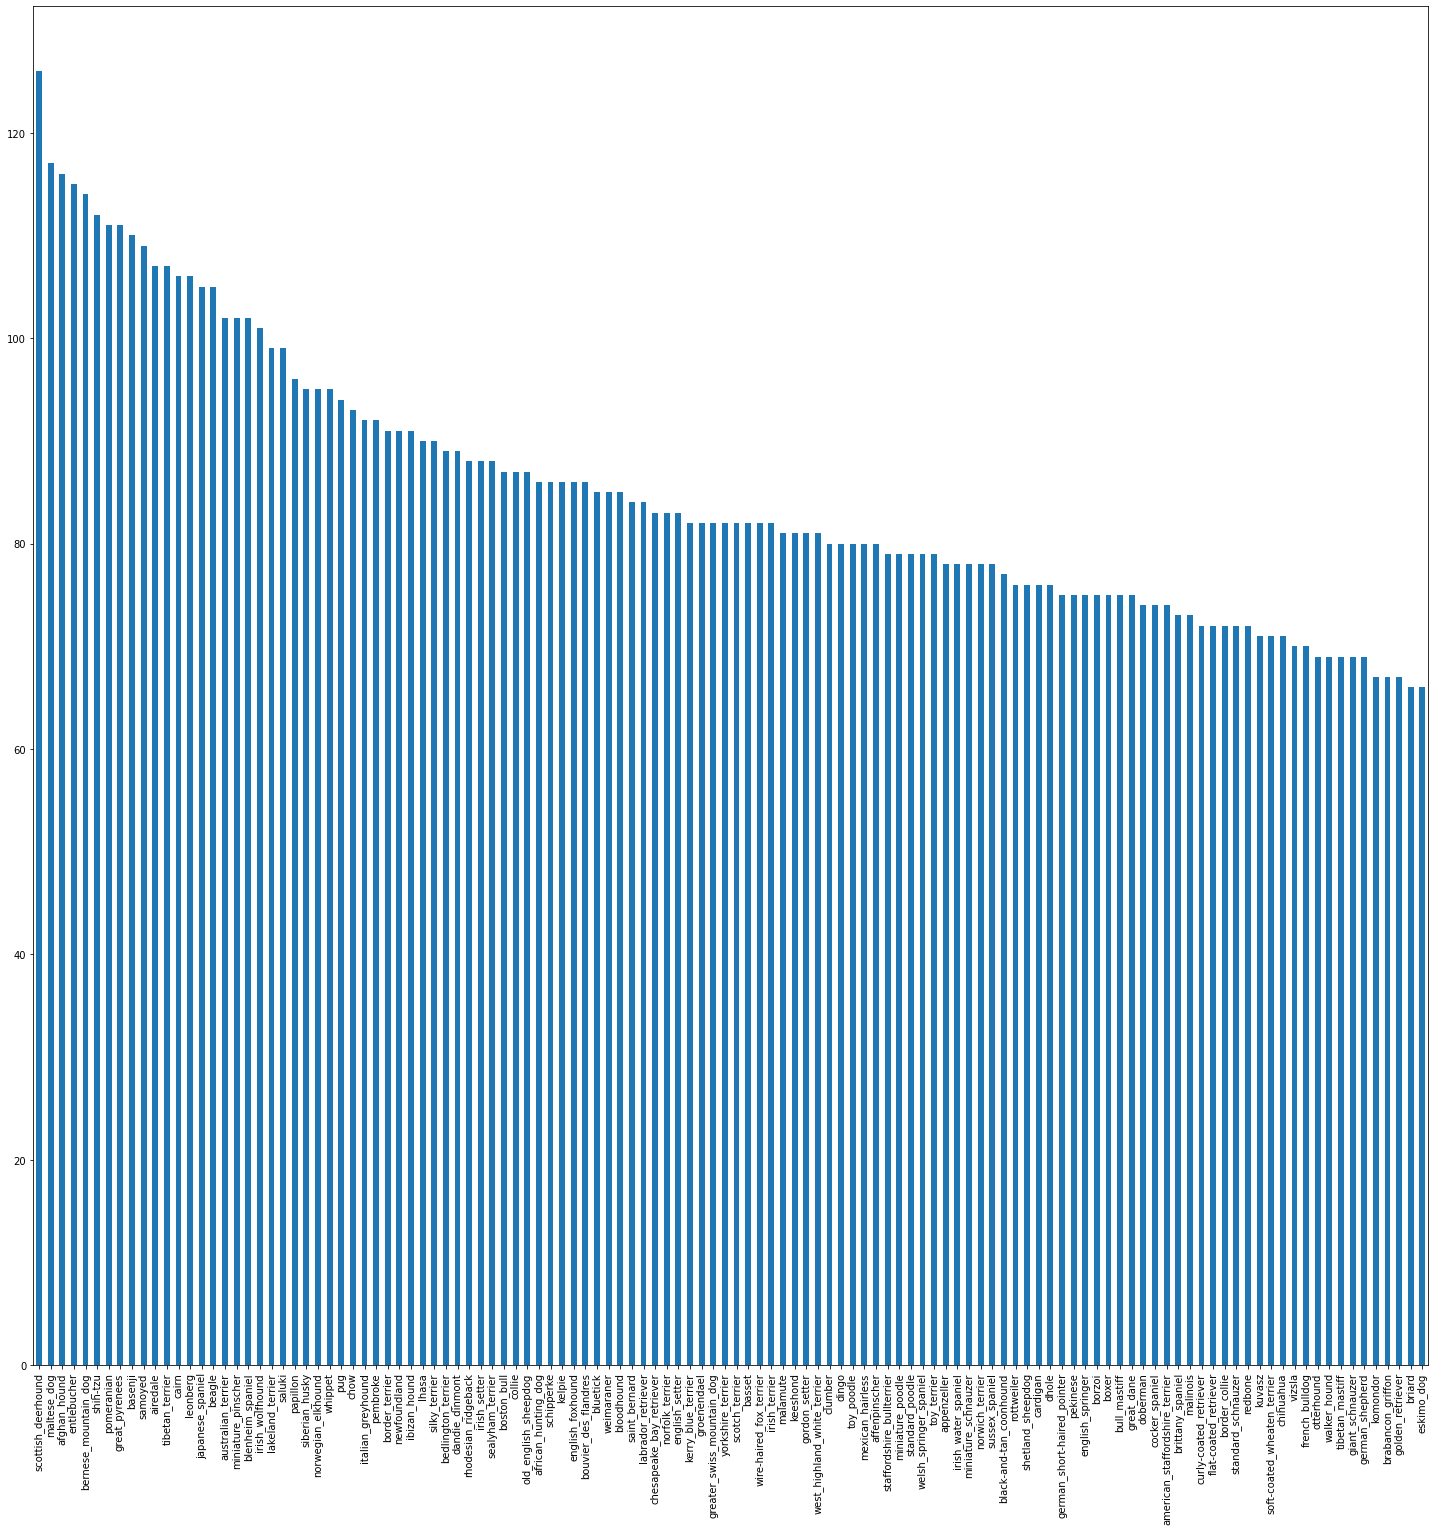

In [6]:
label_csv["breed"].value_counts().plot.bar(figsize=(25,25))

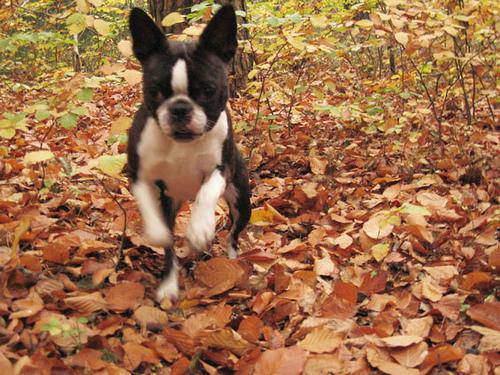

In [7]:
#View an image
from IPython.display import Image
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [8]:
# We want to take a list for filenames
filenames=["train/"+x+".jpg" for x in label_csv["id"]]

In [9]:
# Check the number of this list match with the number of actual image files
import os
if len(os.listdir("train/"))==len(filenames):
    print("ok")
else:
    print("not ok")

ok


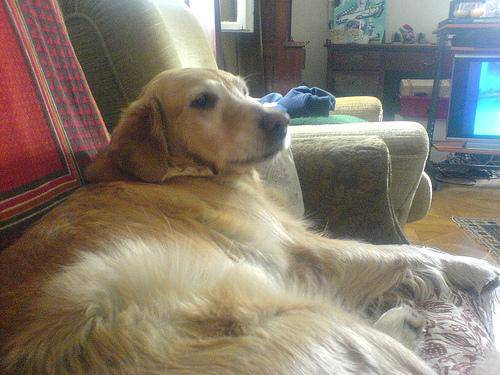

In [10]:
#Check the filenames list working correct
Image(filenames[25])

Since we've now got our training images filepath in a list,let's prepare our labels

we want to convert our labels to numbers

In [11]:
labels=label_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
if len(filenames)==len(labels):
    print("ok")
else:
    print("not ok")

ok


In [13]:
unique_breeds=np.unique(labels)

In [14]:
print(labels[5])
labels[5]==unique_breeds

bedlington_terrier


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
#Turn every label to boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
#Example: Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds==labels[0]))#index whre label accures
print(boolean_labels[0].argmax())#index where label accures in boolean array
print(boolean_labels[0].astype(int))# there will be a 1 whre the sample label accures

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation test
Since the dataset from Kaggle doesn't come with a validation test, we're going to create our own.

In [17]:
x=filenames
y=boolean_labels

We're going to start off exprimenting with 1000 images and increase as needed

in deep learning modules the hyperparameters usually are in capital.

In [18]:
NUM_IMAGES=1000

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=.2)

## Preprocessing images: Turning images into Tensors

To preprocess our images into tensors we're going to write a function which does few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified image

Before we do, let's see what importing an image look like

(375, 500, 3) this means 375*500 pixels in 3 channel RGB

In [20]:
#Convert an image to numpy
from matplotlib.pyplot import imread
image=imread(filenames[25])
image

array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]],

       [[156,  62,  80],
        [148,  68,  81],
        [133,  76,  83],
        ...,
        [225, 244, 251],
        [227, 246, 253],
        [229, 248, 255]],

       ...,

       [[ 36,  26,  17],
        [ 47,  37,  28],
        [ 58,  45,  36],
        ...,
        [211, 206, 203],
        [212, 207, 204],
        [212, 207, 204]],

       [[ 34,  23,  17],
        [ 47,  36,  30],
        [ 60,  47,  41],
        ...,
        [211, 206, 203],
        [214, 209, 206],
        [214, 209, 206]],

       [[ 49,  38,  34],
        [ 54,  43,  39],
        [ 56,  42,  39],
        ...,
        [210, 205, 202],
        [214, 209, 206],
        [215, 210, 207]]

### Tensors can run on GPU but numpy array can only run on cpu so we have to convert it

In [21]:
# create a constant tensor from a tensor lije object
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]],

       [[156,  62,  80],
        [148,  68,  81],
        [133,  76,  83],
        ...,
        [225, 244, 251],
        [227, 246, 253],
        [229, 248, 255]],

       ...,

       [[ 36,  26,  17],
        [ 47,  37,  28],
        [ 58,  45,  36],
        ...,
        [211, 206, 203],
        [212, 207, 204],
        [212, 207, 204]],

       [[ 34,  23,  17],
        [ 47,  36,  30],
        [ 60,  47,  41],
        ...,
        [211, 206, 203],
        [214, 209, 206],
        [214, 209, 206]],

       [[ 49,  38,  34],
        [ 54,  43,  39],
        [ 56,  42,  39],
        ...,
        [210, 205, 20

# Search for Load image in TensorFlow

In [22]:
tensors=tf.io.read_file(filenames[52])
tensors=tf.image.decode_jpeg(tensors,channels=3)
tensors=tf.image.convert_image_dtype(tensors,tf.float32)
tensors=tf.image.resize(tensors,size=(224,224))
tensors

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.17078832, 0.1237295 , 0.07667067],
        [0.18687475, 0.13981593, 0.09275711],
        [0.19063628, 0.14357744, 0.09651861],
        ...,
        [0.2913166 , 0.17366955, 0.1305323 ],
        [0.27483025, 0.15718322, 0.11628679],
        [0.25034007, 0.132693  , 0.09347732]],

       [[0.17342937, 0.12637055, 0.07931173],
        [0.18231294, 0.13525411, 0.08819528],
        [0.17743097, 0.13037215, 0.08331333],
        ...,
        [0.2838736 , 0.16622654, 0.12308928],
        [0.27266932, 0.15502226, 0.11316548],
        [0.2561024 , 0.13845533, 0.09755898]],

       [[0.19079633, 0.1437375 , 0.09667867],
        [0.18863547, 0.14157663, 0.09451781],
        [0.17078832, 0.1237295 , 0.07667067],
        ...,
        [0.27563027, 0.1579832 , 0.11484595],
        [0.27210897, 0.1544619 , 0.11132465],
        [0.26274508, 0.14509802, 0.10196076]],

       ...,

       [[0.27683124, 0.2001602 , 0.16870782],
        [0.32

In [23]:
IMG_SIZE=224
def process_image(image_path):
    '''
    Take an image filepath and turn image to tensors
    '''
    #Read an image file
    image=tf.io.read_file(image_path)
    #Turn the jpeg file into numerical tensors with 3 channel
    image=tf.image.decode_jpeg(image,channels=3)
    #normalize pixels from 0-255 to 0-1
    image=tf.image.convert_image_dtype(image,tf.float32)
    #resize the tensors
    image=tf.image.resize(image,size=(IMG_SIZE,IMG_SIZE))
    return image

### what is batch?
a small portion of train data.

ofcourse batch=1 is always better but yake so many time, but don't use mini batches more than 32.
## Turning our data into batches

why turn our data into batches?

let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

so that's why we do about 32 images at a time

in order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this `(image,label)`

In [24]:
def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label

In [25]:
BATCH_SIZE=32
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    '''
    Creates batches of data out of image (X) and label (y) pairs
    Shuffles the data if it's training data but doesn't shuffle if it is valid data
    Also accepts test data as input (no label)
    '''
    #data==test data
    if test_data:
        print("Creating test data batches ...")
        data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
        data_batches=data.map(process_image).batch(batch_size)
        return data_batches
    #data== valid data
    if valid_data:
        print("Creating validation data batches ...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batches=data.map(get_image_label).batch(batch_size)
        return data_batches
    #data == train data
    else:
        print("Creating Training data batches ...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data=data.shuffle(buffer_size=len(x))
        data_batches=data.map(get_image_label).batch(batch_size)
        return data_batches

In [26]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

Creating Training data batches ...
Creating validation data batches ...


In [27]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
 
 None refer to batch size we define it 32 but it shows none batch because batch is flexible and can be changed

## Visualizing Data Batches

our data is now in batches, however this can be a little hard to understand let's visualize them.

In [28]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
    plt.figure(figsize=(25,25))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[np.argmax(labels[i])])
        plt.axis("off")

In [29]:
train_images,train_labels=next(train_data.as_numpy_iterator())

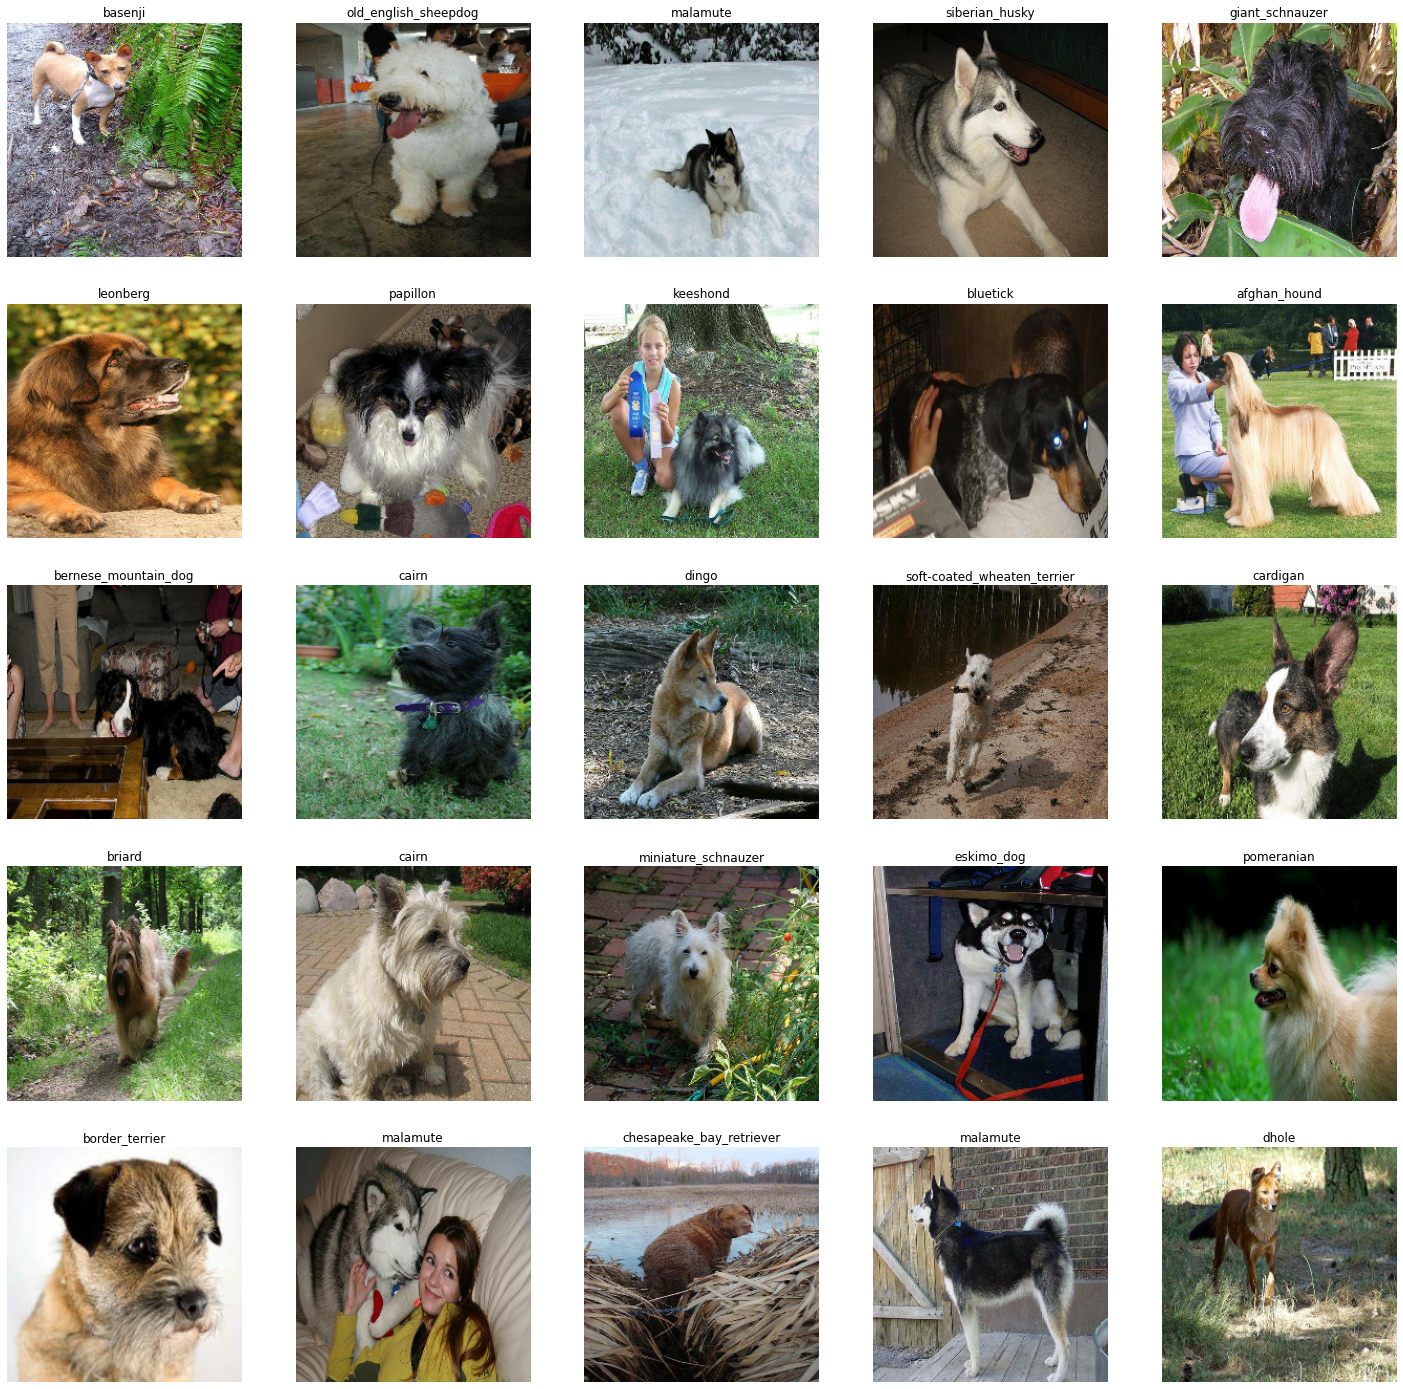

In [30]:
show_25_images(train_images,train_labels)

In [31]:
val_images,val_labels=next(val_data.as_numpy_iterator())

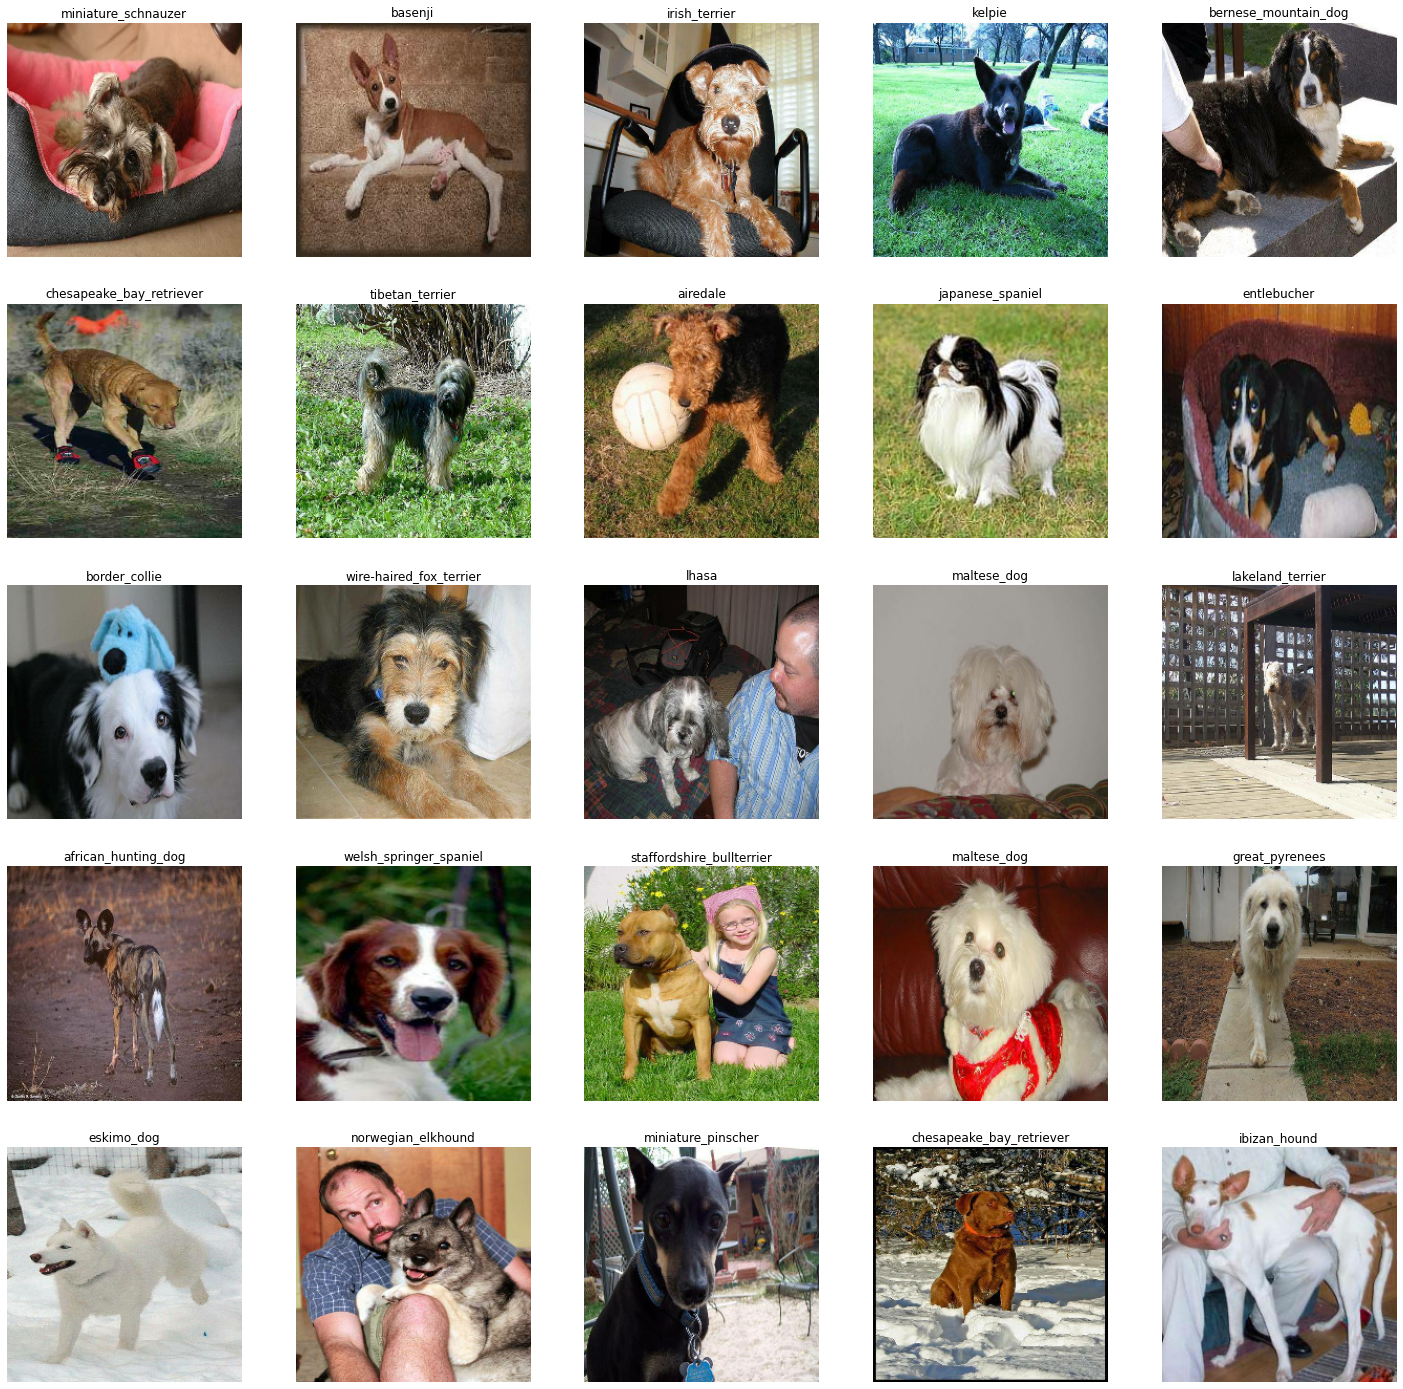

In [32]:
show_25_images(val_images,val_labels)

## Building a Model

Before we build a model, there are a few things we need to define
* The input shape (our image shape , in the form of tensors) to our model.
* The output shape (image labels in the form of tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub.
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

### Where to search for TensorFlow Libraries?
- TnsorFlow Hub   https://www.tensorflow.org/hub
- Pytorch hub
- model zoo
- papers with codes

In [33]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]#batch,height,width,channels
OUTPUT_SHAPE=len(unique_breeds)

In [34]:
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

# Difference between keras functional API and Sequential API: 

https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e#:~:text=Sequential%20and%20Functional%20are%20two,can%20do%20that%20for%20us.

In [35]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)
    
    #Setup the model layers
    model=tf.keras.Sequential([
        hub.KerasLayer(model_url),
        tf.keras.layers.Dense(output_shape,
                              activation="softmax")])
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    model.build(INPUT_SHAPE)
    
    return model

In [36]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [37]:
outputs=np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

we'll create two:

TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long

### TensorBoard Callback

to setup:
1. load the tensorboard extension
2. create a tensorboard callback that able to save logs to a directory and pass it to our model's `fit()` function
3. visualize our model training logs with `%tensorboard` magic function

In [51]:
#Load TensorBoard notebook extension
%load_ext tensorboard

In [39]:
import datetime

# Creat a function to build a Tensorboard Callback
def create_tensorboard_callback():
    #create a log drectory for storing Tensorboard logs
    logdir= os.path.join("logs",
                         #Make it so the logs get tracked whenever we run an expriment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

this prevents overfitting, by stop our model to train if certain evaluation metrics stop improving


In [40]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

# Train Our model (on a subset of the data)

our first model is only going to train on 1000 images, to make sure everything is working

In [41]:
NUM_EPOCHS=100

In [42]:
# Check GPU
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


In [43]:
def train_model():
    model=create_model()
    tensorboard=create_tensorboard_callback()
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard,early_stopping])
    return model

In [44]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 33s 1s/step - loss: 5.2555 - accuracy: 0.0364 - val_loss: 3.5367 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 20s 783ms/step - loss: 1.9733 - accuracy: 0.6418 - val_loss: 2.2317 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 20s 792ms/step - loss: 0.7024 - accuracy: 0.9173 - val_loss: 1.7085 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 20s 788ms/step - loss: 0.2930 - accuracy: 0.9760 - val_loss: 1.5208 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 19s 782ms/step - loss: 0.1561 - accuracy: 0.9983 - val_loss: 1.4218 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 19s 782ms/step - loss: 0.1103 - accuracy: 1.0000 - val_loss: 1.3791 - val_accuracy: 0.6400
Epoch 7/100
25/25 [===========================

## Load up Tensorboard logs and see how our model performing
The TensorBoard magic function (`%tensorboard`) will access the logs directory and visualize its content

In [53]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5884), started 0:01:21 ago. (Use '!kill 5884' to kill it.)

### this is how we see that our model going to overfit and learn well that don't do well on valid set, one of the ways to improve it is, to use more data.

# Prediction

In [121]:
predictions=model.predict(val_data,verbose=1#this is mean show progress
                         )
predictions

7/7 [==============================] - 4s 565ms/step


array([[1.56561192e-02, 1.04878214e-03, 5.94507655e-05, ...,
        1.03030168e-03, 2.55789794e-03, 2.16904711e-02],
       [4.82156203e-04, 7.22472905e-05, 1.11785834e-03, ...,
        2.79456470e-03, 9.76709463e-03, 3.38867249e-04],
       [2.77171377e-04, 5.62874266e-05, 1.46827661e-05, ...,
        1.65631325e-04, 1.77140068e-03, 6.35890886e-02],
       ...,
       [6.82604557e-04, 3.31686181e-03, 1.14473914e-04, ...,
        2.07936493e-04, 1.95833927e-04, 7.08368170e-05],
       [5.58477303e-04, 1.17868985e-04, 2.71049561e-04, ...,
        5.65763330e-04, 1.15601544e-03, 1.18991193e-04],
       [7.28566549e-04, 1.29968998e-06, 4.98255831e-04, ...,
        5.49205625e-03, 4.81108058e-04, 2.37979339e-06]], dtype=float32)

In [55]:
predictions.shape

(200, 120)

In [68]:
unique_breeds[np.argmax(predictions[42])],np.max(predictions[42])

('miniature_schnauzer', 0.67848736)

In [62]:
np.sum(predictions[5])

1.0000001

In [64]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

### Let's bring these to a function

In [70]:
def get_pred_label(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]
get_pred_label(predictions[5])

'chesapeake_bay_retriever'

Since our validation data is still in batch mode we have to unbatch it for comparison

In [79]:
def unbatch_data(dataset):
    images=[]
    labels=[]
    for image,label in dataset.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(label)
    return images,labels

In [78]:
images_=[]
labels_=[]

for image,label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)
get_pred_label(labels_[20]),get_pred_label(predictions[20])

('eskimo_dog', 'samoyed')

### unbatch validation datas

In [80]:
val_images,val_labels=unbatch_data(val_data)

In [81]:
get_pred_label(val_labels[20])

'eskimo_dog'

## Visualization Predictions

In [107]:
def plot_pred(predictions_probabilities,labels,images, n=1):
    '''
    View the prediction, truth label and image for sample n
    '''
    pred_prob,true_label,image=predictions_probabilities[n],labels[n],images[n]
    
    #Get the pred label and true label
    true_label=get_pred_label(true_label)
    pred_label=get_pred_label(pred_prob)
    
    #Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the color of the title depending if the prediction is right or wrong
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    # Plot title to be predicted,probabilty of prediction and truth label
    
    plt.title("predicted {} by {:2.0f}%\ntrue label: {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),color=color)

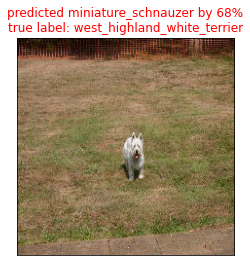

In [110]:
plot_pred(predictions,val_labels,val_images,n=42)

## Now we want to see our model top 10 predictions

In [151]:
def plot_pred_conf(pred_probabilities,labels,n=1):
    '''
    plot the tops 10 predictions vs truth label for sample n
    '''
    
    pred_prob,true_label=pred_probabilities[n],labels[n]
    
    pred_label=get_pred_label(pred_prob)
    true_label=get_pred_label(true_label)
    
    #Find the top 10 predictions confidence
    top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
    top_10_pred_values=pred_prob[top_10_pred_indexes]
    top_10_pred_labels=unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    
    #change the color of true label:
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")

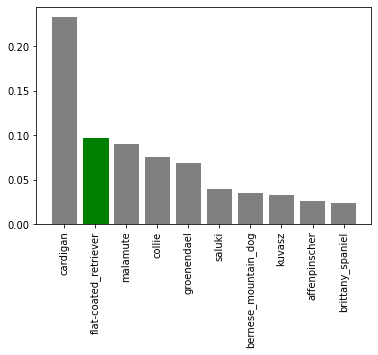

In [152]:
plot_pred_conf(predictions,val_labels,120)

In [132]:
unique_breeds[predictions[0].argsort()[-10:]]

array(['west_highland_white_terrier', 'boxer', 'border_terrier',
       'affenpinscher', 'cairn', 'norfolk_terrier', 'yorkshire_terrier',
       'silky_terrier', 'standard_schnauzer', 'miniature_schnauzer'],
      dtype=object)

In [131]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.6006391 , 0.15909085, 0.02945984, 0.02169047, 0.02099336,
       0.01970774, 0.01565612, 0.01145652, 0.00863069, 0.00742291],
      dtype=float32)

In [134]:
np.array([1,5,6,7,2,3,4]).argsort()#sort by ascending

array([0, 4, 5, 6, 1, 2, 3], dtype=int64)

## now we want to have these 2 way together

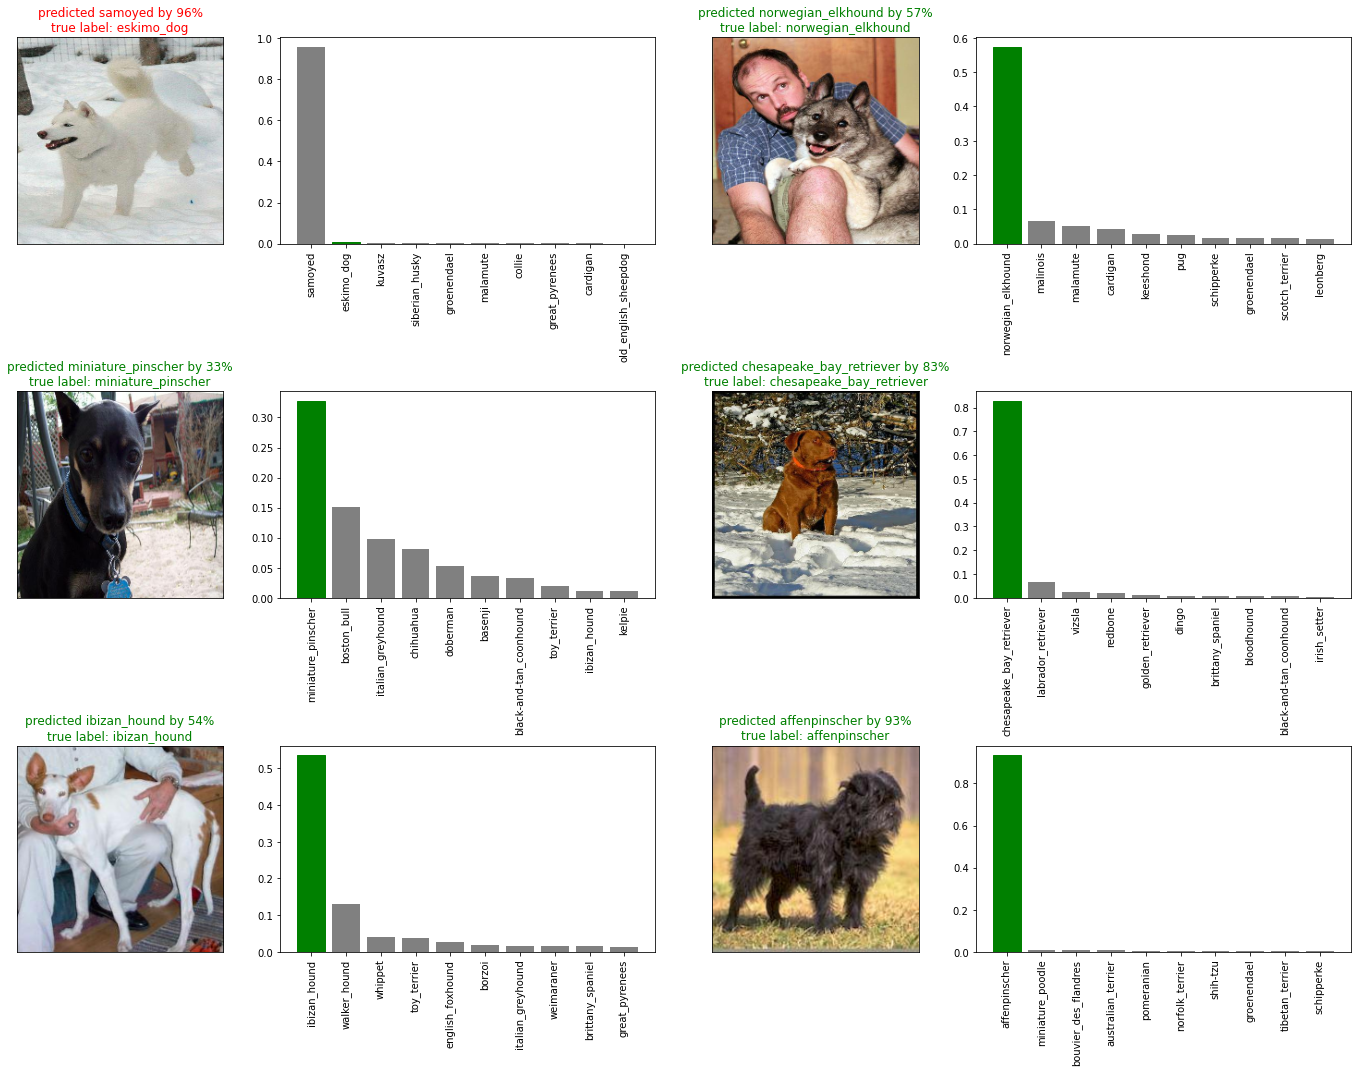

In [161]:
i_multipelier=20
num_rows=3
num_cols=2
num_images=num_cols*num_rows
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(predictions,
              val_labels,
              val_images,
              n=i+i_multipelier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(predictions,
                   val_labels,
                   n=i+i_multipelier)
    plt.tight_layout(h_pad=1.0)

# Saving and Load a trained model

In [173]:
def save_model(model,suffix=None):
    '''
    saves a given model in a models directory and
    appends a suffix (string)
    '''
    #Create a model directory pathname with current time
    modeldir=os.path.join("models",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path=modeldir+"-"+suffix+".h5" #save format of model
    print(f"saving model to:{model_path}...")
    model.save(model_path)
    return model_path

In [174]:
def load_model(model_path):
    print(f"loading save model from : {model_path}")
    model=tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer}
                                    #beacuase we use a custom model from hub we have to mention it
                                    )
    return model

In [175]:
#Save our model trained on 1000 images
save_model(model,suffix="1000-mobilenetv2-adam")

saving model to:models\20201130-175941-1000-mobilenetv2-adam.h5...


'models\\20201130-175941-1000-mobilenetv2-adam.h5'

In [178]:
model_1=load_model('models\\20201130-175941-1000-mobilenetv2-adam.h5')

loading save model from : models\20201130-175941-1000-mobilenetv2-adam.h5


### Evaluate the pre-saved model

In [179]:
model.evaluate(val_data)

7/7 [==============================] - 5s 624ms/step - loss: 1.2651 - accuracy: 0.6650


[1.2651273012161255, 0.6650000214576721]

In [180]:
model_1.evaluate(val_data)

7/7 [==============================] - 5s 614ms/step - loss: 1.2651 - accuracy: 0.6650


[1.2651273012161255, 0.6650000214576721]

# Train On Full Data Set

In [182]:
len(x),len(x_train)

(10222, 800)

In [183]:
# Create a data batch with the full data set
full_data=create_data_batches(x,y)

Creating Training data batches ...


In [184]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [186]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [187]:
#Create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
#No validation set when training on all data,so we can't monitor validation acuuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

### Running the cell blow will take so much time maybe 1 hour

In [ ]:
# #Fit the model
# full_model.fit(x=full_data,
#                epochs=100,
#                callbacks=[full_model_tensorboard,full_model_early_stopping])

## This model is trained in the colab

In [188]:
full_model=load_model("models\\20201130-164449-full_set_mobilenet_Adam.h5")

loading save model from : models\20201130-164449-full_set_mobilenet_Adam.h5


In [189]:
full_model.evaluate(val_data)

7/7 [==============================] - 5s 553ms/step - loss: 0.0054 - accuracy: 1.0000


[0.005390126723796129, 1.0]

# make Predictions and Evaluation with test set from Kaggle

science ourmodel has been trained on images in the form of Tensor batches, tomake predictions onthe test data,we'll have to get it into the same format.

to makepredictions on the test data, we'll
* Get the test file names
* Convert filenames into test data batches using `create_data_batches` and setting the `test_data` parameter to `True` science the test data doesn't have labels
* make predictions

In [190]:
# Load test image filenames:
test_path="test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]

In [191]:
test_filenames[5]

'test/00225dcd3e4d2410dd53239f95c0352f.jpg'

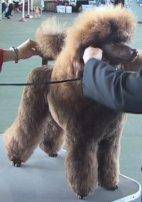

In [193]:
Image(test_filenames[5])

In [194]:
test_data=create_data_batches(x=test_filenames,
                                 test_data=True)

Creating test data batches ...


In [195]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [196]:
test_predictions=full_model.predict(test_data,
                                    verbose=1)

324/324 [==============================] - 226s 695ms/step


In [199]:
np.max(test_predictions[5])

0.69754565

In [198]:
#save predictions (Numpy array) tocsv file
np.savetxt("preds_array.csv",test_predictions,
           delimiter=',')

In [202]:
#Load predictions from csv file
test_predictions=np.loadtxt("preds_array.csv",delimiter=',')

### Make our predictions to what Kaggle want

In [225]:
preds_df=pd.DataFrame(columns=columns)
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [214]:
columns=["id"]+list(unique_breeds)

### Create ID

In [218]:
[os.path.splitext(test_filenames[10])]

[('test/0041940322116ae58c38130f5a6f71f9', '.jpg')]

In [224]:
test_ids=np.array([os.path.splitext(path) for path in os.listdir(test_path)])[:,0]

In [226]:
preds_df["id"]=test_ids

In [227]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [228]:
preds_df[list(unique_breeds)]=test_predictions

In [229]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.69207e-11  5.23855e-12   
1  00102ee9d8eb90812350685311fe5890   3.01764e-06  2.53103e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   8.31013e-12  2.29091e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   4.00103e-06  1.58851e-07   
4  001a5f3114548acdefa3d4da05474c2e   0.000100988  1.88794e-05   

  african_hunting_dog     airedale american_staffordshire_terrier  \
0         1.33837e-14  1.29703e-13                    9.74344e-13   
1          3.9463e-08  3.11946e-09                    1.51117e-06   
2         2.57818e-09  1.01108e-11                    3.70021e-12   
3         2.11545e-06  1.50471e-07                    4.92236e-05   
4         6.72512e-09  1.06961e-09                    2.65897e-09   

   appenzeller australian_terrier      basenji       basset  ...   toy_poodle  \
0  5.14669e-12         2.7538e-16  4.80169e-13  8.78011e-14  ...  3.20345e-12   
1  5.10195e-09        3.32012e-06  6.08006e-07  9.02929e-09  ...  9.58024e-09   
2  4.55663e-09        4.91167e-12  1.57358e-12  1.11536e-09  ...   4.9696e-13   
3  4.89632e-07         9.9714e-12  9.49225e-10  5.86991e-08  ...    1.091e-05   
4  1.86114e-11        7.71318e-10  1.12884e-08  8.19424e-09  ...  1.19906e-07   

   toy_terrier       vizsla walker_hound   weimaraner welsh_springer_spaniel  \
0  8.15226e-14  6.29267e-14  2.80457e-14  4.32376e-14            1.19846e-12   
1  9.30928e-07  5.11105e-09  1.46428e-06  5.76954e-08            8.46039e-08   
2  9.30729e-12  2.14085e-07  1.36364e-07  1.34751e-08            8.91953e-09   
3  2.14771e-10  8.52599e-06  4.31361e-10  7.50665e-08            6.85247e-09   
4  6.82449e-11   1.6003e-10  1.58079e-10  8.27145e-10            3.20347e-09   

  west_highland_white_terrier      whippet wire-haired_fox_terrier  \
0                 5.38876e-13  2.18229e-13             1.31621e-09   
1                 0.000246225  4.88411e-11             8.81466e-08   
2                 2.19594e-12  3.18633e-07             7.12059e-12   
3                 7.09862e-16   0.00635189             4.00012e-11   
4                 4.11132e-11  7.05997e-08             3.76507e-10   

  yorkshire_terrier  
0       2.99948e-11  
1       4.48719e-10  
2       5.04939e-11  
3       4.16377e-07  
4       5.29004e-08  

[5 rows x 121 columns]

# Save our dataframe to submit to kaggle

![image](first_sub.png)

#### As you see our score is good and we got 800 place in leaderboard but it can improve very much

In [230]:
preds_df.to_csv("Full-model_predictions_submission.csv",
                index=False)

# Predict Some Photo
To make predictions on custom images:
* Get the filepath of our own images
* Turn the filepath into data batches
* predict
* Convert predict to visualize

In [232]:
custom_path="custom/"
custom_image_path=[custom_path + fname for fname in os.listdir(custom_path)]

In [233]:
custom_image_path

['custom/dog-photo-1.jpeg',
 'custom/dog-photo-2.jpeg',
 'custom/dog-photo-3.jpeg']

In [234]:
custom_data=create_data_batches(x=custom_image_path,
                    test_data=True)

Creating test data batches ...


In [237]:
custom_predictions=full_model.predict(custom_data,
                                      verbose=1)

1/1 [==============================] - 0s 350ms/step


In [241]:
custom_pred_labels=[get_pred_label(custom_predictions[i]) for i in range(len(custom_predictions))]
custom_pred_labels

['golden_retriever', 'lakeland_terrier', 'labrador_retriever']

In [244]:
#unbatch_data() won't work
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

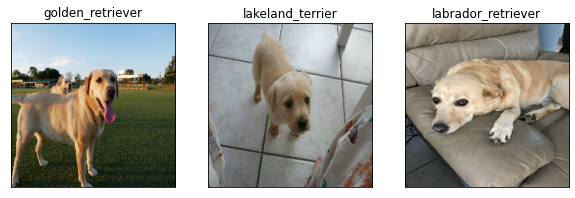

In [247]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)